# 실습 예제 연습용 주피터  


## KNN 2주차 실습

In [1]:
import numpy as np
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [4]:
print(fish_data.shape)
print(fish_target.reshape(-1,1).shape)

(49, 2)
(49, 1)


### 데이터 스케일링

In [6]:
tr_mean = np.mean(train_input, axis=0)
tr_std = np.std(train_input, axis=0)
te_mean = np.mean(test_input, axis=0)
te_std = np.std(test_input, axis=0)

train_scaled = (train_input - tr_mean) / tr_std
test_scaled = (test_input - te_mean) / te_std

#z-score scaling

### 훈련/테스트 나누기

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
#kn.fit(train_scaled, train_target) # 정규화
print(kn.score(test_scaled, test_target))
print(kn.predict([[25, 150]]))

0.23076923076923078
[0.]


### 시각화

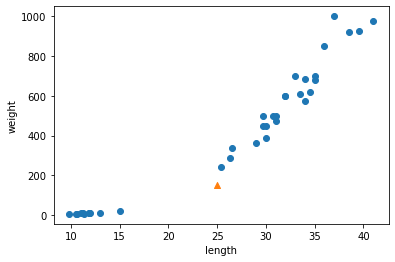

In [32]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 최소거리

In [33]:
distances, indexes = kn.kneighbors(X=[[25, 150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]
[[12 29  5 19  4]]


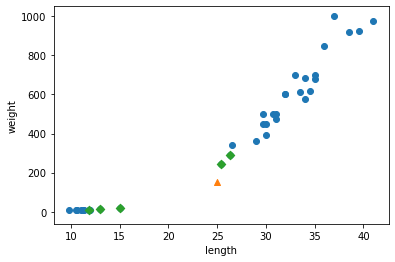

In [34]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 시각화

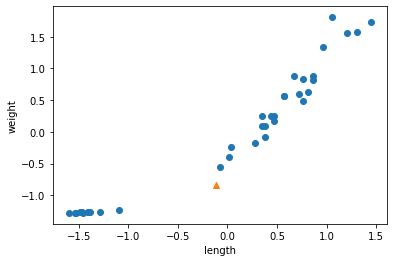

In [14]:
import matplotlib.pyplot as plt
new = ([25, 150] - tr_mean) / tr_std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 규제, 제약식, 회귀 3주차

In [38]:
from sklearn import datasets
raw_boston = datasets.load_boston()
print(raw_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 데이터와 라벨 처리

In [47]:
X = raw_boston.data[:,5] # 5개 특성
y = raw_boston.target

print(raw_boston.data.shape)
print(X.shape)

(506, 13)
(506,)
(506,)


### 훈련 세트와 테스트세트 나누기

In [94]:
from sklearn.model_selection import train_test_split
x_tn, x_te, y_tn, y_te = train_test_split(X,y ,random_state=0)
print(x_tn.shape)
print(y_tn.shape)
print(x_te.shape)
print(y_te.shape)

(379,)
(379,)
(127,)
(127,)


### 선형회귀 훈련

In [148]:
from sklearn.linear_model import LinearRegression
clf_lr =LinearRegression()
clf_lr.fit(x_tn.reshape(-1,1), y_tn.reshape(-1,1))
print(clf_lr.score(x_te.reshape(-1,1),y_te.reshape(-1,1)))

0.4679000543136781


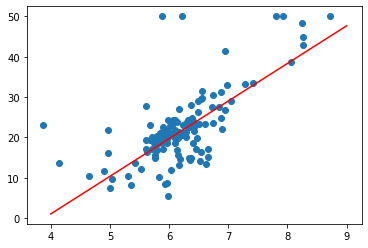

In [149]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x_te,y_te)
plt.plot([4,9],[ 4*clf_lr.coef_[0] + clf_lr.intercept_, 9* clf_lr.coef_ + clf_lr.intercept_],'r')

## 서포트 벡터 머신 4주차 - 1 

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:2] ## 길이와 폭만 사용
y = iris.target

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
from sklearn.model_selection import train_test_split
x_tn, x_te, y_tn, y_te = train_test_split(X,y, random_state = 0)


In [5]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1e10).fit(x_tn,y_tn)


In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_te,model.predict(x_te)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.79      0.69      0.73        16
           2       0.55      0.67      0.60         9

    accuracy                           0.79        38
   macro avg       0.78      0.78      0.78        38
weighted avg       0.80      0.79      0.79        38



### 예제

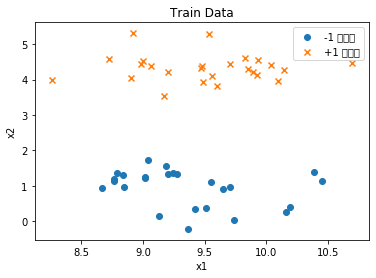

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")# 0번째 줄, 
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Train Data")
plt.show()

## SVM 모델 훈련

In [19]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1e10).fit(X,y) # C는 slack variable

## 시각화

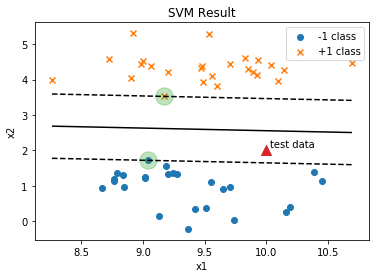

In [22]:
import numpy as np

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10) # min~ max 10분할
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy) #직사각형의 그리드

Z = np.empty(X1.shape) #배열 생성 - 쓰레기값

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]

levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM Result")

plt.show()

SVC를 사용하여 모형을 구하면 다음과 같은 속성값을 가진다.

n_support_: 각 클래스의 서포트의 개수

support_: 각 클래스의 서포트의 인덱스

support_vectors_: 각 클래스의 서포트의 x 값. 𝑥+와 𝑥−

coef_: 𝑤 벡터

intercept_: −𝑤0

dual_coef_: 각 원소가 𝑎𝑖⋅𝑦𝑖로 이루어진 벡터

In [24]:
model.n_support_ # 서포트 개수

array([1, 1])

In [25]:
model.support_ # 서포트의 인덱스

array([42,  1])

In [26]:
model.support_vectors_ #각 클래스의 서포트의 x 값. 𝑥+와 𝑥−

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [27]:
model.coef_

array([[0.08171082, 1.10091404]])

In [28]:
model.intercept_

array([-3.62995208])

In [29]:
y[model.support_]

array([-1,  1])

## 커널 svm 예제

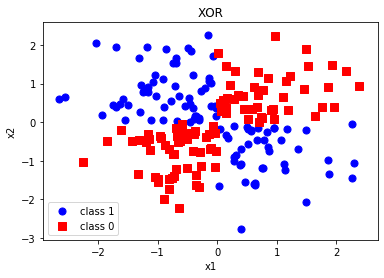

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] >0, X_xor[:,1] >0)
y_xor = np.where(y_xor, 1,0)

plt.scatter(X_xor[y_xor == 1,0], X_xor[y_xor==1,1], c='b', marker='o', label='class 1', s=50)
plt.scatter(X_xor[y_xor == 0,0], X_xor[y_xor==0,1], c='r', marker='s', label='class 0', s=50)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR')
plt.show()

## 가우시안 나이브 베이즈  4주차 - 2

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_te, model.predict(x_te)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.73      0.69      0.71        16
           2       0.50      0.56      0.53         9

    accuracy                           0.76        38
   macro avg       0.74      0.75      0.75        38
weighted avg       0.77      0.76      0.77        38



In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
from sklearn import datasets
raw_wine = datasets.load_wine()
X = raw_wine.data
y = raw_wine.target

In [4]:
#data 전처리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)

#data stardardize
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train) # train data 정규화의 필요한 파라미터 뽑음
X_tn_std = std_scale.transform(X_train) #실제 정규화 일어남
X_te_std = std_scale.transform(X_test) # 실제 정규화
#정답은 정규화 할 필요 없음(categorical)

In [6]:
#모델 학습 (Gaussian Naive Bayes)
from sklearn.naive_bayes import GaussianNB
#가우시안이 무엇을 하는가
#표본평균하고 표본분산을 가진 정규분포하에 베이즈정리를 적용
mdl = GaussianNB()
mdl.fit(X_tn_std, y_train)

GaussianNB()

In [8]:
pred = mdl.predict(X_te_std)
print(pred)

[0 2 1 0 1 1 0 2 1 1 2 2 0 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [ ]:
#성능 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_test,pred)
print(class_report)